<a href="https://colab.research.google.com/github/cmbernardi/predicting_heart_disease/blob/master/heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Heart Disease

World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half of the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This project intends to point out the most relevant/risk factors of heart disease as well as predict the overall risk.

**Data Source:**
The dataset is publically available on Kaggle website. The data is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information including over 4,000 records and 15 attributes.

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, roc_auc_score

In [ ]:
url = 'https://raw.githubusercontent.com/dphi-official/Datasets/master/framingham.csv'
heart_df= pd.read_csv(url)
heart_df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


### Variables :
Each attribute is a potential risk factor. There are both demographic, behavioural and medical risk factors.

- Demographic: 
  - sex: male or female;(1 = male; 0 = female)

  - age: age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

- Behavioural:

  - currentSmoker: whether or not the patient is a current smoker (0 = nonsmoker; 1 = smoker)

  - cigsPerDay: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarretts, even half a cigarette.)

- Medical(history):

  - BPMeds: whether or not the patient was on blood pressure medication (0 = No; 1 = Yes)

  - prevalentStroke: whether or not the patient had previously had a stroke (0 = No; 1 = Yes)

  - prevalentHyp: whether or not the patient was hypertensive (0 = No; 1 = Yes)

  - diabetes: whether or not the patient had diabetes (0 = No; 1 = Yes)

- Medical(current):

  - totChol: total cholesterol level (Continuous)

  - sysBP: systolic blood pressure (Continuous)

  - diaBP: diastolic blood pressure (Continuous)

  - BMI: Body Mass Index (Continuous)

  - heartRate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

  - glucose: glucose level (Continuous)

- Predict variable (desired target):

  - 10 year risk of coronary heart disease CHD (1 = Yes; 0 = No)


## Data Cleaning

In [ ]:
# missing values

heart_df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [ ]:
count=0
for i in heart_df.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('Total number of rows with missing values is ', count)
print('since it is only',round((count/len(heart_df.index))*100), 'percent of the entire dataset the rows with missing values are excluded.')

Total number of rows with missing values is  582
since it is only 14 percent of the entire dataset the rows with missing values are excluded.


In [ ]:
heart_df.dropna(axis=0,inplace=True)

## Exploring the Data

In [ ]:
heart_df.TenYearCHD.value_counts()

0    3101
1     557
Name: TenYearCHD, dtype: int64

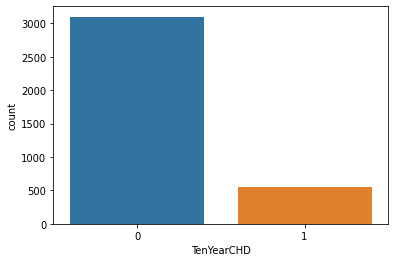

In [ ]:
sns.countplot(x='TenYearCHD',data=heart_df)

There are 3101 patents with no heart disease and 557 patients with risk of heart disease.

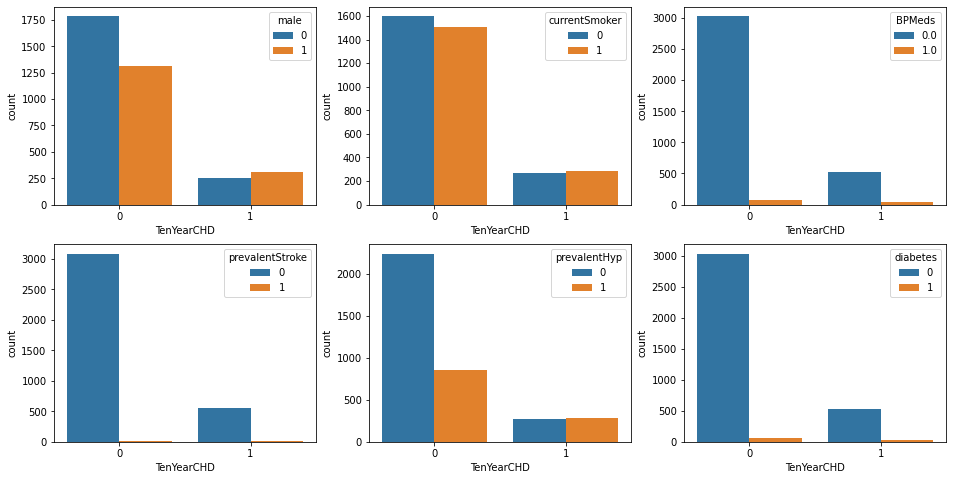

In [ ]:
plt.figure(figsize=(16, 8))

# sex
plt.subplot(2, 3, 1)
sns.countplot(x='TenYearCHD',data=heart_df, hue='male')

# smoker
plt.subplot(2, 3, 2)
sns.countplot(x='TenYearCHD',data=heart_df, hue='currentSmoker')

# on blood pressure medication
plt.subplot(2, 3, 3)
sns.countplot(x='TenYearCHD',data=heart_df, hue='BPMeds')

# had a stroke
plt.subplot(2, 3, 4)
sns.countplot(x='TenYearCHD',data=heart_df, hue='prevalentStroke')

# hypertensive
plt.subplot(2, 3, 5)
sns.countplot(x='TenYearCHD',data=heart_df, hue='prevalentHyp')

# had diabetes
plt.subplot(2, 3, 6)
sns.countplot(x='TenYearCHD',data=heart_df, hue='diabetes')


- It looks like men have more chances to develop heart disease.
- Smoking and hypertension also seem to have an influence on developing heart disease (especially hypertension). 

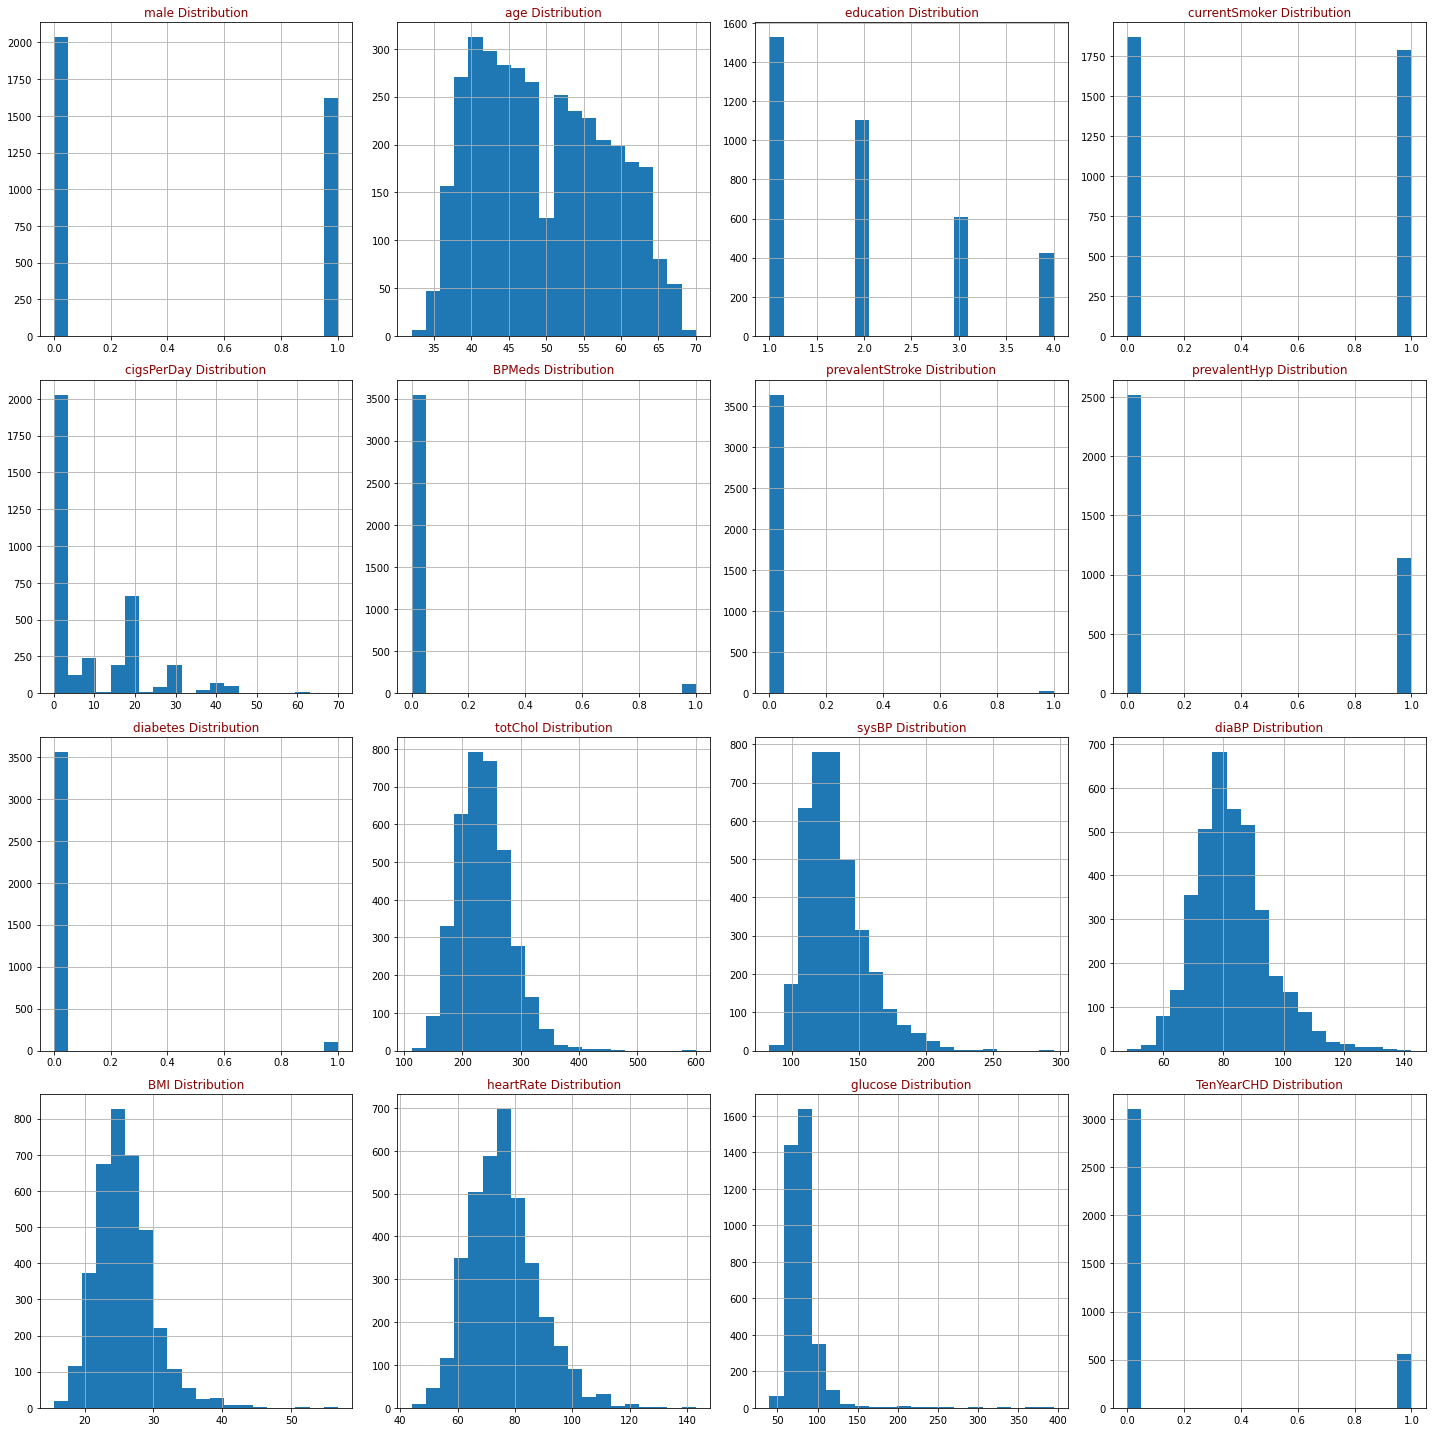

In [ ]:

def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax)
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(heart_df,heart_df.columns,4,4)

## Splitting the data

In [ ]:
import sklearn

x = heart_df.drop('TenYearCHD', axis=1)
y = heart_df.TenYearCHD

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=5)


## Feature Selection and Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=10000)  

from sklearn.feature_selection import RFE

rfe = RFE(estimator= model , step = 1)

fit = rfe.fit(x_train, y_train)

print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 7
Selected Features: [ True  True False  True False  True  True  True  True False False False
 False False False]
Feature Ranking: [1 1 2 1 4 1 1 1 1 8 5 7 3 9 6]


In [ ]:
selected_rfe_features = pd.DataFrame({'Feature':list(x_train.columns),
                                      'Ranking':rfe.ranking_})
selected_rfe_features.sort_values(by='Ranking')

,Feature,Ranking
0,male,1
1,age,1
3,currentSmoker,1
5,BPMeds,1
6,prevalentStroke,1
7,prevalentHyp,1
8,diabetes,1
2,education,2
12,BMI,3
4,cigsPerDay,4


In [ ]:
# Transforming the data
x_train_rfe = rfe.transform(x_train)
x_test_rfe = rfe.transform(x_test)

# Fitting our baseline model with the transformed data
model_rfe = model.fit(x_train_rfe, y_train)

## Evaluating the performance

In [ ]:
predicted = model_rfe.predict(x_test_rfe)

model_rfe_ac = accuracy_score(y_test, predicted)

print("RFE Model Accuracy:", model_rfe_ac)

RFE Model Accuracy: 0.8565573770491803


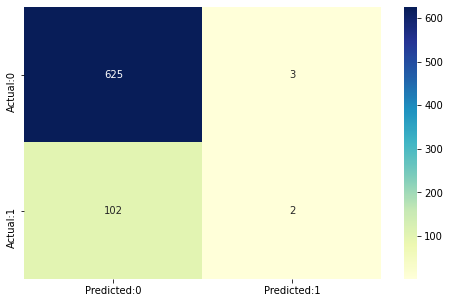

In [ ]:
# confusion matrix

cm=confusion_matrix(y_test,predicted)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

The confusion matrix shows 625+2 = 627 correct predictions and 102+3= 105 incorrect ones.

- True Positives: 2

- True Negatives: 625

- False Positives: 3 (Type I error)

- False Negatives: 102 ( Type II error)

In [ ]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [ ]:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',
      
      '     ***********************************************\n'

'The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'     ***********************************************\n'

'Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'     ***********************************************\n'

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

'     ***********************************************\n'

'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

'     ***********************************************\n'

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',

'     ***********************************************\n'

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'     ***********************************************\n'

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.8565573770491803 
      ***********************************************
The Missclassification = 1-Accuracy =  0.14344262295081966 
      ***********************************************
Sensitivity or True Positive Rate = TP/(TP+FN) =  0.019230769230769232 
      ***********************************************
Specificity or True Negative Rate = TN/(TN+FP) =  0.9952229299363057 
      ***********************************************
Positive Predictive value = TP/(TP+FP) =  0.4 
      ***********************************************
Negative predictive Value = TN/(TN+FN) =  0.859697386519945 
      ***********************************************
Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  4.02564102564098 
      ***********************************************
Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.9854769230769231


From the above statistics it is clear that the model is more specific than sensitive. The negative values are predicted more accurately than the positives.

A common way to visualize the trade-offs of different thresholds is by using an ROC curve, a plot of the true positive rate (true positives/ total positives) versus the false positive rate (false positives / total negatives) for all possible choices of thresholds. A model with good classification accuracy should have significantly more true positives than false positives at all thresholds.

The optimum position for roc curve is towards the top left corner where the specificity and sensitivity are at optimum levels.

## **Predicted probabilities of 0 (No Coronary Heart Disease) and 1 ( Coronary Heart Disease: Yes) for the test data with a default classification threshold of 0.5**

In [ ]:
y_pred_prob = model.predict_proba(x_test_rfe)[:,:]
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of no heart disease (0)','Prob of Heart Disease (1)'])
y_pred_prob_df.head()

,Prob of no heart disease (0),Prob of Heart Disease (1)
0,0.967356,0.032644
1,0.962392,0.037608
2,0.625000,0.375000
3,0.863939,0.136061
4,0.849355,0.150645


## **Lower the threshold**
Since the model is predicting Heart disease too many type II errors is not advisable. A False Negative (ignoring the probability of disease when there actually is one) is more dangerous than a False Positive in this case. Hence, to increase the sensitivity, the threshold can be lowered.

In [ ]:
from sklearn.preprocessing import binarize
for i in range(1,5):
    cm2=0
    y_pred_prob_yes = model.predict_proba(x_test_rfe)
    y_pred2 = binarize(y_pred_prob_yes,i/10)[:,1]
    cm2 = confusion_matrix(y_test,y_pred2)
    print ('With',i/10,'threshold the Confusion Matrix is ','\n',cm2,'\n',
            'with',cm2[0,0]+cm2[1,1],'correct predictions and',cm2[1,0],'Type II errors( False Negatives)','\n\n',
          'Sensitivity: ',cm2[1,1]/(float(cm2[1,1]+cm2[1,0])),'Specificity: ',cm2[0,0]/(float(cm2[0,0]+cm2[0,1])),'\n\n\n')

With 0.1 threshold the Confusion Matrix is  
 [[300 328]
 [ 19  85]] 
 with 385 correct predictions and 19 Type II errors( False Negatives) 

 Sensitivity:  0.8173076923076923 Specificity:  0.47770700636942676 



With 0.2 threshold the Confusion Matrix is  
 [[493 135]
 [ 48  56]] 
 with 549 correct predictions and 48 Type II errors( False Negatives) 

 Sensitivity:  0.5384615384615384 Specificity:  0.785031847133758 



With 0.3 threshold the Confusion Matrix is  
 [[576  52]
 [ 81  23]] 
 with 599 correct predictions and 81 Type II errors( False Negatives) 

 Sensitivity:  0.22115384615384615 Specificity:  0.9171974522292994 



With 0.4 threshold the Confusion Matrix is  
 [[614  14]
 [ 96   8]] 
 with 622 correct predictions and 96 Type II errors( False Negatives) 

 Sensitivity:  0.07692307692307693 Specificity:  0.9777070063694268 





## **ROC curve**

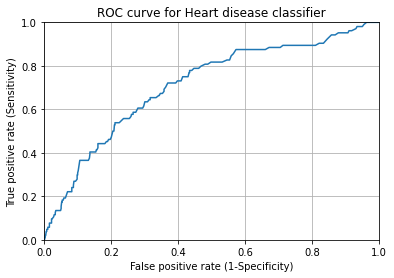

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart disease classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

## **Area Under The Curve (AUC)**

In [ ]:
sklearn.metrics.roc_auc_score(y_test,y_pred_prob_yes[:,1])

0.7106580720235178

## **Conclusions:**
- All attributes selected after the elimination process show P-values lower than 5% and thereby suggesting a significant role in the Heart disease prediction.

- The current medical conditions had less influence than patients' medical history.

- The model predicted with an accuracy of 0.86 and is more specific than sensitive.

- The area under the ROC curve is 0.71 which is somewhat satisfactory.

- The overall model could be improved with more data.